In [4]:
#Exercise 4: Classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

y_train_pred = classifier.predict(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
y_test_pred = classifier.predict(X_test_scaled)

#1
print("Train : ", y_train_pred[:10])
print("Test : ", y_test_pred[:10])


Train :  [1 0 1 1 1 0 0 1 1 0]
Test :  [1 1 0 0 0 1 1 1 0 0]


In [8]:
#2
#Compute F1, accuracy, precision, recall, roc_auc scores on the train set and test set. Print the confusion matrix on the test set results
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

print("\nTrain")
f1=f1_score(y_train, y_train_pred)
acc=accuracy_score(y_train, y_train_pred)
precision=precision_score(y_train, y_train_pred)
recall=recall_score(y_train, y_train_pred)
roc_auc= roc_auc_score(y_train, classifier.predict_proba(X_train_scaled)[:,1])

print("F1 on the train set: ", f1)
print("Accuracy on the train set: ", acc)
print("Recall on the train set: ", recall)
print("Precision on the train set : ", precision)
print("ROC_AUC on the train set: ", roc_auc)

print("\nTest")
f1_test =f1_score(y_test, y_test_pred)
acc_test=accuracy_score(y_test, y_test_pred)
precision_test=precision_score(y_test, y_test_pred)
recall_test=recall_score(y_test, y_test_pred)
roc_auc_test= roc_auc_score(y_test, classifier.predict_proba(X_test_scaled)[:,1])

print("F1 on the test set: ", f1_test)
print("Accuracy on the test set: ", acc_test)
print("Recall on the test set: ", recall_test)
print("Precision on the test set : ", precision_test)
print("ROC_AUC on the test set: ", roc_auc_test)


cm = confusion_matrix(y_test, y_test_pred)
print("\nmatrix\n", cm)


Train
F1 on the train set:  0.9911504424778761
Accuracy on the train set:  0.989010989010989
Recall on the train set:  0.9929078014184397
Precision on the train set :  0.9893992932862191
ROC_AUC on the train set:  0.9990161111794368

Test
F1 on the test set:  0.9801324503311258
Accuracy on the test set:  0.9736842105263158
Recall on the test set:  0.9866666666666667
Precision on the test set :  0.9736842105263158
ROC_AUC on the test set:  0.9863247863247864

matrix
 [[37  2]
 [ 1 74]]


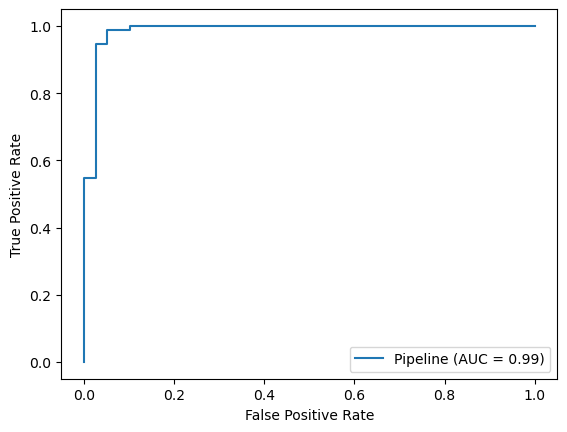

In [6]:
#3
from sklearn import metrics
# Print the confusion matrix on the test set results.
fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(X_test_scaled)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#                                   estimator_name='Pipeline')
# display.plot()
# plt.show()

plt.plot(fpr, tpr, label='Pipeline (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
